In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def read_and_plot_mle_betas(directory):
    """
    Reads all 'mle_betas.csv' files from each subfolder in the given directory
    and returns a dictionary {'loc_code': mle_betas_df}.
    """
    dataframes = {}

    # Loop through all subfolders in the directory
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        file_path = os.path.join(folder_path, "mle_betas.csv")

        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            df.drop(columns=df.columns[0], inplace=True)
            dataframes[folder] = df

        # Only plot some of the dataframes
        if int(folder) % 20 == 0:
            plot_data(df, folder)

    return dataframes


def plot_data(df, loc_code):
    """ """
    median = df.median(axis=0)
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=range(308), y=median.values)
    plt.title(f"Median Betas | Location {loc_code} | 2023-06-25 through 2024-04-27")
    plt.xlabel("Days after 2023.06.25")
    plt.ylabel("Beta")
    plt.show()

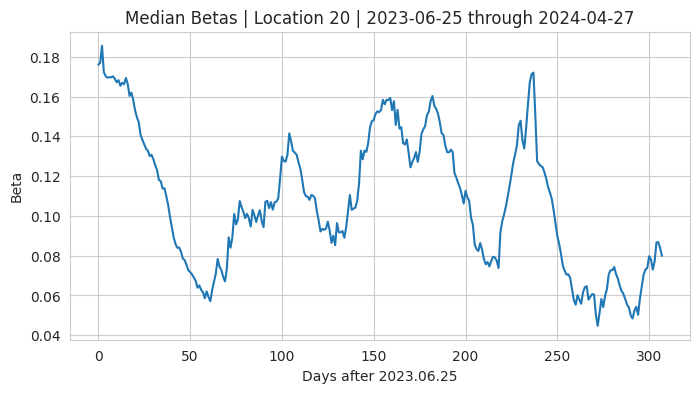

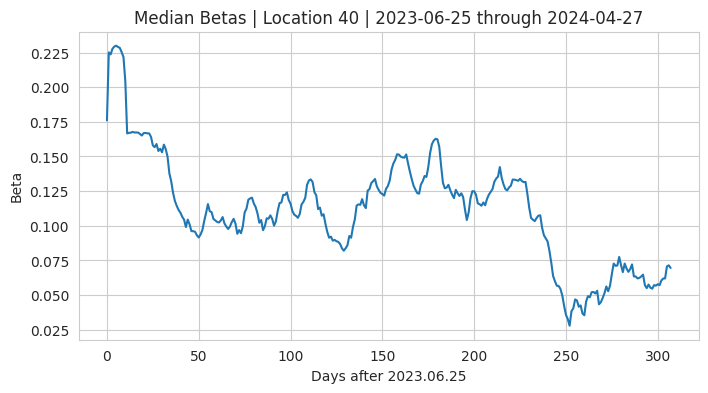

In [14]:
from src.utils import paths

pmcmc_run_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_run_20241013")
all_dataframes = read_and_plot_mle_betas(pmcmc_run_dir)

In [15]:
all_data = pd.concat(all_dataframes.values(), ignore_index=True)
all_data

,0,1,2,3,4,5,6,7,8,9,...,298,299,300,301,302,303,304,305,306,307
0,0.067848,0.169392,0.164721,0.173424,0.154507,0.170007,0.171320,0.171014,0.169383,0.175610,...,0.061600,0.061169,0.057601,0.057074,0.053559,0.052595,0.059234,0.069479,0.072649,0.070826
1,0.245696,0.174526,0.168970,0.158654,0.169306,0.183306,0.166143,0.163397,0.157885,0.162687,...,0.032712,0.034362,0.037148,0.050455,0.049813,0.052237,0.058664,0.058960,0.055852,0.054743
2,0.217472,0.163148,0.162770,0.160494,0.182264,0.187858,0.179769,0.179842,0.182843,0.186703,...,0.049302,0.049864,0.054612,0.033987,0.040961,0.040106,0.046942,0.053603,0.057862,0.055050
3,0.079635,0.166748,0.173102,0.174965,0.174309,0.176322,0.198447,0.194548,0.191986,0.191768,...,0.032791,0.025942,0.029068,0.033056,0.040404,0.040354,0.028899,0.042300,0.057537,0.043683
4,0.070206,0.172320,0.172595,0.172809,0.174336,0.170007,0.182181,0.184004,0.180367,0.172583,...,0.040611,0.029885,0.027147,0.052092,0.029849,0.023697,0.039533,0.033144,0.039193,0.051764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,0.063224,0.213517,0.143116,0.151482,0.145804,0.154675,0.160810,0.175325,0.172468,0.175204,...,0.110298,0.107451,0.108854,0.108672,0.107845,0.102073,0.102351,0.098976,0.097950,0.097283
15596,0.083176,0.213944,0.227791,0.155937,0.145773,0.150797,0.108759,0.166830,0.170866,0.171128,...,0.103884,0.100642,0.086292,0.090603,0.101533,0.111554,0.107208,0.101380,0.093743,0.094552
15597,0.075015,0.222783,0.223409,0.131845,0.147984,0.148739,0.115522,0.162838,0.159189,0.164133,...,0.089325,0.092952,0.091354,0.076390,0.073950,0.096160,0.113034,0.101395,0.097386,0.097463
15598,0.166226,0.213236,0.214530,0.132019,0.131566,0.129310,0.151073,0.163187,0.154558,0.148281,...,0.076940,0.079817,0.077033,0.083349,0.078264,0.069543,0.103645,0.106227,0.108308,0.111829


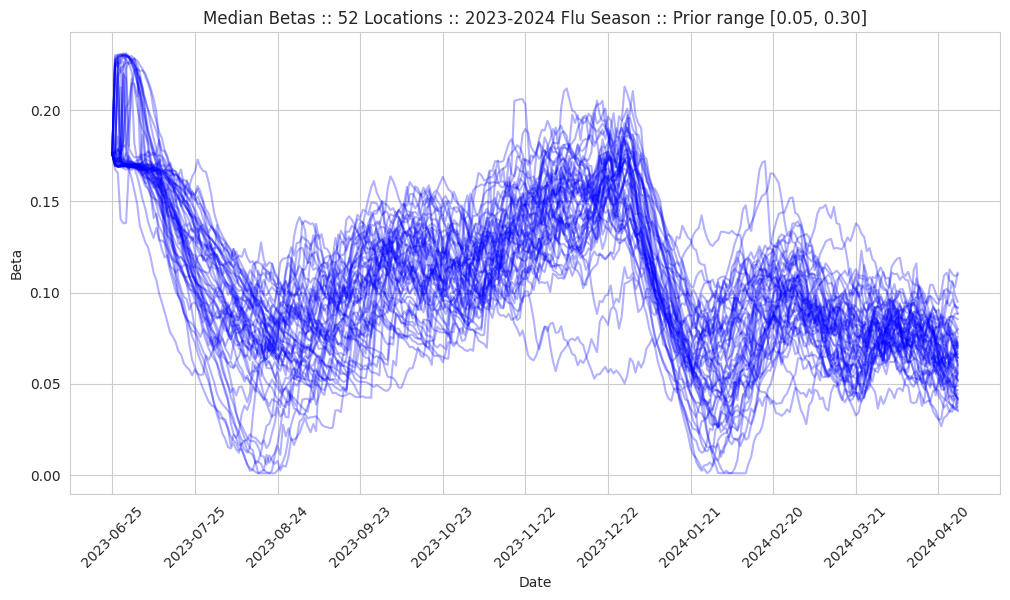

In [21]:
# Create a list of dates starting from 2023-06-25 for 307 days
start_date = pd.to_datetime("2023-06-25")
date_range = pd.date_range(
    start=start_date, periods=308
)  # 308 days including the last one

plt.figure(figsize=(12, 6))

for df in all_dataframes.values():
    sns.lineplot(x=date_range, y=df.median(axis=0), alpha=0.3, color="blue")

plt.title(
    "Median Betas :: 52 Locations :: 2023-2024 Flu Season :: Prior range [0.05, 0.30]"
)
plt.ylabel("Beta")
plt.xlabel("Date")
plt.xticks(date_range[::30], rotation=45)  # Show every 30th date
plt.show()

Changing the beta prior range from [0.05, 0.3] to [0.9, 0.11] 

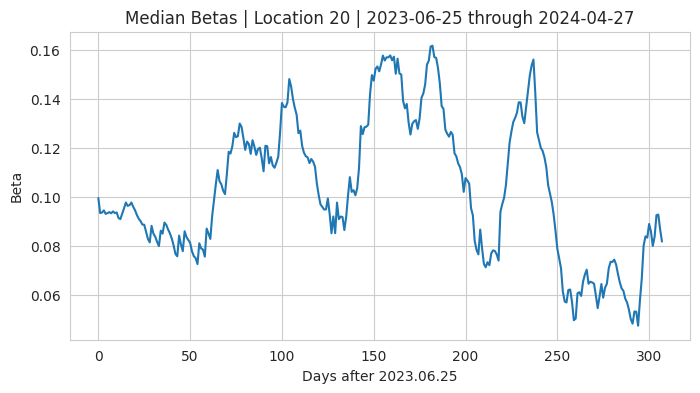

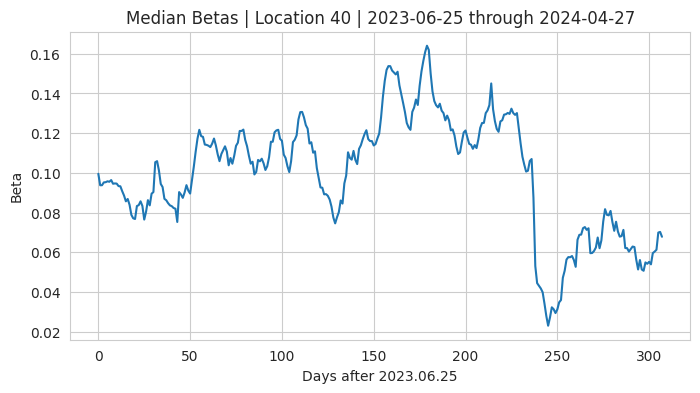

In [17]:
pmcmc_run_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_0.10_prior_20241013")
all_dataframes_2 = read_and_plot_mle_betas(pmcmc_run_dir)

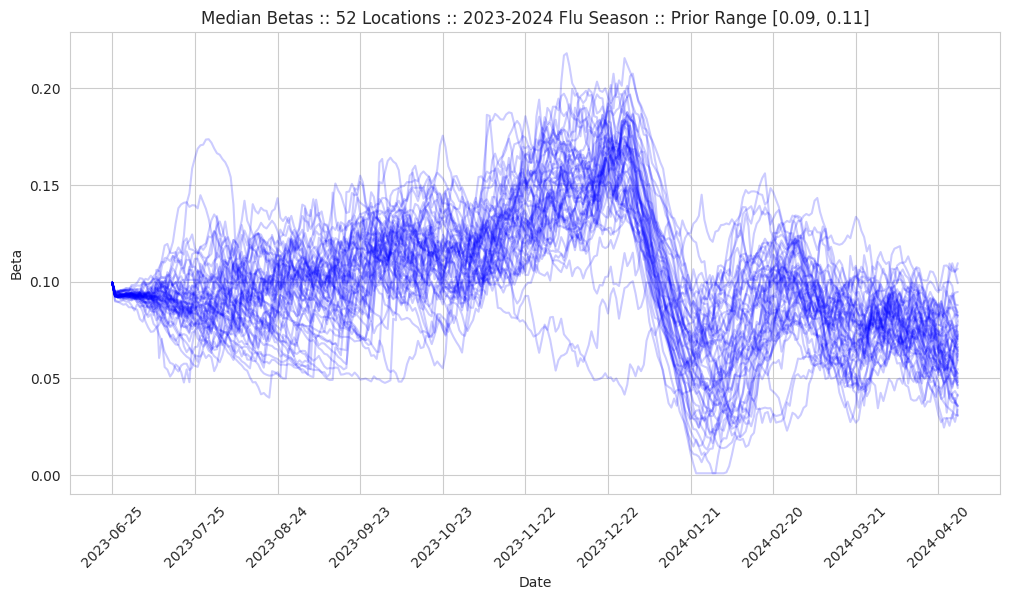

In [20]:
all_data_2 = pd.concat(all_dataframes_2.values(), ignore_index=True)

# Create a list of dates starting from 2023-06-25 for 307 days
start_date = pd.to_datetime("2023-06-25")
date_range = pd.date_range(
    start=start_date, periods=308
)  # 308 days including the last one

plt.figure(figsize=(12, 6))

for df in all_dataframes_2.values():
    sns.lineplot(x=date_range, y=df.median(axis=0), alpha=0.2, color="blue")

plt.title(
    "Median Betas :: 52 Locations :: 2023-2024 Flu Season :: Prior Range [0.09, 0.11]"
)
plt.ylabel("Beta")
plt.xlabel("Date")
plt.xticks(date_range[::30], rotation=45)  # Show every 30th date
plt.show()